In [ ]:
# DEPENDENCIES OF THIS NOTEBOOK:
# 0. detectron2 | torchvision
# 1. mounted google drive of mailto://karantanwar469@gmail.com - This contains the saved model in .pth format
# 2. COCOdataset retinanet cfg ('COCO-Detection/retinanet_R_101_FPN_3x.yaml')

In [1]:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 56.5MB/s 
     |████████████████████████████████| 276kB 6.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200704-cp36-none-any.whl size=41894 sha256=aa80ec3af09c39b537aa856ada5789aad2cc2e71c15330d72b6ba46f2312cbc6
  Stored in directory: /root/.cache/pip/wheels/fb/d2/8e/b6d0f19811e77dabff1ebed6605ce2b59ee9f487079b434c8c
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=e142b7e597e1221ecf24ff5728e9da2b61e4b724987511e26f6036295606acb5
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built fvcore pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 70

In [12]:
import pandas as pd
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import json
import codecs
import requests
import urllib
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO
import itertools
import random
import os

In [13]:
import torch
import torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.data import datasets, DatasetCatalog, MetadataCatalog, build_detection_train_loader, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

In [8]:
!mv ./model_final.pth ./output

In [21]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg

--2020-07-09 19:59:20--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘banner-diverse-group-of-people-2.jpg’

banner-diverse-grou 100%[===================>]   1.83M  1.79MB/s    in 1.0s    

2020-07-09 19:59:21 (1.79 MB/s) - ‘banner-diverse-group-of-people-2.jpg’ saved [1923610/1923610]



In [23]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg.MODEL.WEIGHTS = './output/model_final.pth'
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.50

'./output/model_final.pth'

In [26]:
MODEL_PATH = 'COCO-Detection/retinanet_R_101_FPN_3x.yaml'
def cfg_test():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(MODEL_PATH))
    cfg.MODEL.WEIGHTS = '/content/drive/My Drive/Colab Notebooks/checkpoint_face.pth'
    cfg.MODEL.RETINANET.NUM_CLASSES = 1
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.50
    
    return cfg

cfg = cfg_test()
predict = DefaultPredictor(cfg)

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


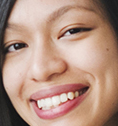

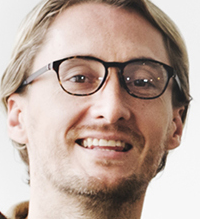

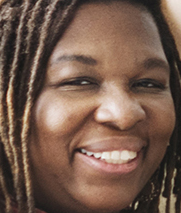

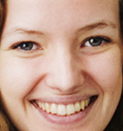

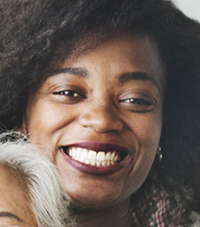

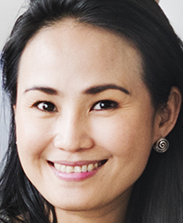

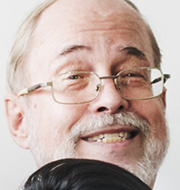

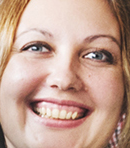

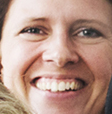

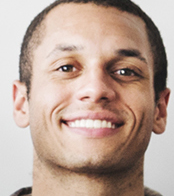

In [66]:
from google.colab.patches import cv2_imshow

img = cv2.imread('./people.jpg', cv2.IMREAD_COLOR)
output = predict(img)
pred_boxes = np.array(output['instances']._fields['pred_boxes'].tensor.cpu(), dtype='int32')
pred_boxes
for i in pred_boxes:
  cv2_imshow(img[i[1]:i[3],i[0]:i[2],:])